<h1>Retail price prediction - www.machinehack.com </h1>
In this competition, we are challenging the MachineHack community to come up with an algorithm to predict the price of retail items belonging to different categories. 

In [1]:
#import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#load dataframe
df_train = pd.read_csv('Train.csv')
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35


In [3]:
#test set

df_test = pd.read_csv('Test.csv')
df_test.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
0,3139,1709,1079,3,2011-02-22 15:22:00,16161.0,35
1,617,510,3457,1,2010-12-08 12:46:00,17341.0,35
2,14653,604,694,36,2011-10-25 13:53:00,15158.0,35
3,8634,1478,3473,2,2011-06-27 12:38:00,16033.0,35
4,15546,3216,871,1,2011-11-06 16:14:00,15351.0,35


### EDA

In [4]:
df_train.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

There is no null in the dataset

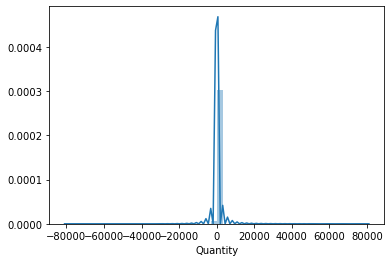

In [5]:
sns.distplot(df_train['Quantity'])

Quantity has negative value

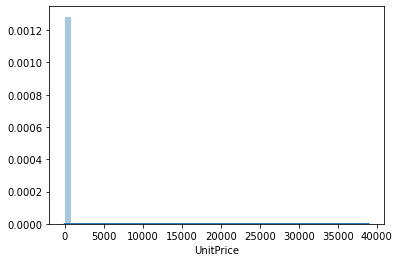

In [6]:
sns.distplot(df_train['UnitPrice'])

Price is skewed

In [7]:
col = ['InvoiceNo','StockCode','Description']
for val in col:
    print(val,'has unique value----',df_train[val].nunique())

InvoiceNo has unique value---- 20971
StockCode has unique value---- 3619
Description has unique value---- 3819


In [8]:
df_train.corr() #the correlation

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country
InvoiceNo,1.000000,0.086809,0.024804,-0.008363,0.007927,-0.007463,0.005432
StockCode,0.086809,1.000000,-0.013230,-0.000942,0.020073,0.002887,0.006242
Description,0.024804,-0.013230,1.000000,0.000194,-0.000424,-0.005227,-0.014791
Quantity,-0.008363,-0.000942,0.000194,1.000000,-0.000924,-0.002930,-0.008001
UnitPrice,0.007927,0.020073,-0.000424,-0.000924,1.000000,-0.004932,-0.005378
CustomerID,-0.007463,0.002887,-0.005227,-0.002930,-0.004932,1.000000,0.388198
Country,0.005432,0.006242,-0.014791,-0.008001,-0.005378,0.388198,1.000000


### Feature Engineering

In [9]:
#Extracting field of month, year, weekday and no of week from invoice date

df_train['InvoiceDate'] = pd.to_datetime(df_train['InvoiceDate'])
df_train['month'] = df_train['InvoiceDate'].apply(lambda date:date.month)
df_train['year'] = df_train['InvoiceDate'].apply(lambda date:date.year)
df_train['weekday'] = df_train['InvoiceDate'].apply(lambda date:date.weekday())
df_train['No_of_Week'] = df_train['InvoiceDate'].apply(lambda date:date.week)

#test set
df_test['InvoiceDate'] = pd.to_datetime(df_test['InvoiceDate'])
df_test['month'] = df_test['InvoiceDate'].apply(lambda date:date.month)
df_test['year'] = df_test['InvoiceDate'].apply(lambda date:date.year)
df_test['weekday'] = df_test['InvoiceDate'].apply(lambda date:date.weekday())
df_test['No_of_Week'] = df_test['InvoiceDate'].apply(lambda date:date.week)

In [10]:
# sorting months based on total UnitPrice sold for each month

df_train.groupby('month').agg('UnitPrice').sum().sort_values(ascending=False)

month
11    138946.730
10    132638.550
6     102385.210
12     96546.120
9      83841.202
5      79160.680
3      66292.840
7      64243.631
4      61228.571
8      59668.270
1      51362.970
2      46522.490
Name: UnitPrice, dtype: float64

In [11]:
#Create a dictionary based on months order and map with month filed to create a new field based on total sales 

dic_month = {11:12,10:11,6:10,12:9,9:8,5:7,3:6,7:5,4:4,8:3,1:2,2:1}  

# Train set
df_train['High_month'] = df_train['month'].map(dic_month)


# Test set

df_test['High_month'] = df_test['month'].map(dic_month)

<b>Create rank of description based on price</b>

In [12]:
df_train.groupby(['Description']).agg('UnitPrice').mean().reset_index().sort_values(by='UnitPrice')

,Description,UnitPrice
2239,2285,0.000750
2554,2611,0.045217
624,636,0.075135
1648,1680,0.090000
2561,2618,0.093571
...,...,...
3502,3571,156.111111
2099,2140,334.676469
869,882,496.340833
2356,2405,649.500000


In [13]:
#create a dictionary with the rank

temp_description_df = df_train.groupby(['Description']).agg('UnitPrice').mean().reset_index().sort_values(by='UnitPrice')
temp_description_df['rank'] = round(temp_description_df['UnitPrice'])
dic_description_ = pd.Series(temp_description_df['rank'].values,index=temp_description_df.Description).to_dict()

In [14]:
#map the rank with description and and create new field 

#train set

df_train['Price_rank']=df_train['Description'].map(dic_description_)

#test set

df_test['Price_rank']=df_test['Description'].map(dic_description_)

<b>Create rank of mean UnitPrice based on per month sales of each description</b>

In [15]:
df_train.groupby(['month','Description']).agg('UnitPrice').mean().reset_index().sort_values(by='UnitPrice')

,month,Description,UnitPrice
18352,9,2285,0.0005
7303,4,2285,0.0010
13741,7,2285,0.0010
21044,10,2611,0.0400
11704,6,2611,0.0400
...,...,...,...
6628,4,1066,993.9300
25260,12,882,1100.4400
22643,11,1043,1301.3350
25373,12,1043,1599.2600


In [16]:
tempdf_product_month = df_train.groupby(['month','Description']).agg('UnitPrice').mean().reset_index().sort_values(by='UnitPrice')
tempdf_product_month['rank'] = round(tempdf_product_month['UnitPrice'])
tempdf_product_month['join'] = tempdf_product_month[['month', 'Description']].apply(lambda x: '-'.join(x.values.astype(str)), axis=1)
tempdf_product_month.head()

,month,Description,UnitPrice,rank,join
18352,9,2285,0.0005,0.0,9-2285
7303,4,2285,0.0010,0.0,4-2285
13741,7,2285,0.0010,0.0,7-2285
21044,10,2611,0.0400,0.0,10-2611
11704,6,2611,0.0400,0.0,6-2611


In [17]:
#test set

df_test['month_nd_des'] = df_test[['month', 'Description']].apply(lambda x: '-'.join(x.values.astype(str)), axis=1)

#creating a unique field by concatinate month and description

df_train['month_nd_des'] = df_train[['month', 'Description']].apply(lambda x: '-'.join(x.values.astype(str)), axis=1)

In [18]:
#change the dataframe to dictionary for mapping 
dic_mon_description_ = pd.Series(tempdf_product_month['rank'].values,index=tempdf_product_month['join']).to_dict()


#map the dictionary with unique field

df_train['Price_rank_des_month']=df_train['month_nd_des'].map(dic_mon_description_)

#test set

df_test['Price_rank_des_month']=df_test['month_nd_des'].map(dic_mon_description_)

In [19]:
df_train.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,weekday,No_of_Week,High_month,Price_rank,month_nd_des,Price_rank_des_month
0,6141,1583,144,3,2011-05-06 16:54:00,3.75,14056.0,35,5,2011,4,18,7,4.0,5-144,4.0
1,6349,1300,3682,6,2011-05-11 07:35:00,1.95,13098.0,35,5,2011,2,19,7,2.0,5-3682,2.0
2,16783,2178,1939,4,2011-11-20 13:20:00,5.95,15044.0,35,11,2011,6,46,12,6.0,11-1939,6.0
3,16971,2115,2983,1,2011-11-22 12:07:00,0.83,15525.0,35,11,2011,1,47,12,1.0,11-2983,1.0
4,6080,1210,2886,12,2011-05-06 09:00:00,1.65,13952.0,35,5,2011,4,18,7,2.0,5-2886,2.0


In [20]:
#droping unnecessary fields, features have already extracted from these so dropped 

df_train = df_train.drop(['InvoiceDate','month_nd_des','Description','InvoiceNo','month','Quantity'],axis=1)
df_test = df_test.drop(['InvoiceDate','month_nd_des','Description','InvoiceNo','month','Quantity'],axis=1)

In [21]:
df_train.corr() #the correlation

,StockCode,UnitPrice,CustomerID,Country,year,weekday,No_of_Week,High_month,Price_rank,Price_rank_des_month
StockCode,1.000000,0.020073,0.002887,0.006242,0.030964,0.005522,0.065914,0.062154,0.115011,0.067398
UnitPrice,0.020073,1.000000,-0.004932,-0.005378,0.000838,-0.001866,-0.002556,0.000621,0.173755,0.296430
CustomerID,0.002887,-0.004932,1.000000,0.388198,-0.037739,0.022035,0.029588,0.018890,-0.016108,-0.008605
Country,0.006242,-0.005378,0.388198,1.000000,-0.017584,0.038032,0.022314,0.021405,-0.023253,-0.012001
year,0.030964,0.000838,-0.037739,-0.017584,1.000000,-0.017985,-0.327274,-0.106634,-0.003683,0.002649
weekday,0.005522,-0.001866,0.022035,0.038032,-0.017985,1.000000,0.004993,0.021833,-0.012778,-0.010857
No_of_Week,0.065914,-0.002556,0.029588,0.022314,-0.327274,0.004993,1.000000,0.771059,-0.009213,-0.008828
High_month,0.062154,0.000621,0.018890,0.021405,-0.106634,0.021833,0.771059,1.000000,-0.006436,0.001666
Price_rank,0.115011,0.173755,-0.016108,-0.023253,-0.003683,-0.012778,-0.009213,-0.006436,1.000000,0.586164
Price_rank_des_month,0.067398,0.296430,-0.008605,-0.012001,0.002649,-0.010857,-0.008828,0.001666,0.586164,1.000000


### Preparing data for model building

In [22]:
#Divide the data into Feature and Label component

X = df_train.drop(['UnitPrice'],axis=1).values 
y = np.log1p(df_train['UnitPrice'].values) #taking log of UnitPrice for the skewed value

In [23]:
#split the data in train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

In [24]:
#scale the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# from sklearn.preprocessing import RobustScaler
# scaler = RobustScaler()
# RobustScaler didn't work well

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
#model xgboost used for better prediction
from sklearn.metrics import mean_squared_error, explained_variance_score,r2_score
from xgboost import XGBRegressor
model_xgb = XGBRegressor(n_estimators=500, max_depth=13, learning_rate=0.11,subsample = 0.5,reg_lambda=0.5) #manually tuned

model_xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.11, max_delta_step=0, max_depth=13,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=2, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [36]:
#check the accuracy metrics

pred_xgb = np.expm1(model_xgb.predict(X_test)) #prediction (exponential taken as it was log term)

y_true = np.expm1(y_test)  #original y_test

print("mean_squared_error=",mean_squared_error(y_true,pred_xgb))
print("explained_variance_score=",explained_variance_score(y_true,pred_xgb))
print("RMSE=",np.sqrt(mean_squared_error(y_true,pred_xgb)))

print("r2_score=",r2_score(y_true,pred_xgb))

mean_squared_error= 363.73132068342414
explained_variance_score= 0.6149821603321978
RMSE= 19.071741417170696
r2_score= 0.6149513765516157


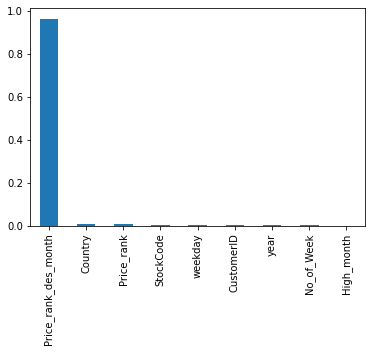

In [30]:
#Feature importance plot

imp_feat=pd.Series(model_xgb.feature_importances_,index=df_train.drop(['UnitPrice'],axis=1).columns)
plt.figure(figsize=(6,4))
imp_feat.sort_values(ascending=False).plot(kind='bar')

In [ ]:
#Final prediction
#  pred_final = np.expm1(model_xgb.predict(x1_test_new))
# pred_csv = pd.DataFrame(pred_final,columns=['UnitPrice'])
# pred_csv.to_csv('prediction.csv', index = False)